## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
print("Есть ли пропущенные?", X.isnull().any().any(),"=> нет")
print("Есть ли тип object?",(X.dtypes == "object").values.any(),"у категориальных тип object, типa object нету совсем => нет категориальных")

Есть ли пропущенные? False => нет
Есть ли тип object? False у категориальных тип object, типa object нету совсем => нет категориальных


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
import random
np.random.seed(123)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
kncs = []
accuracy_table = pd.DataFrame(columns = ['k', 'train accuracy', 'test accuracy'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#создаем объект класса
X_TrainLimit = X_train[["alcohol","magnesium"]]#выбираем только нужные признаки из обучающей выборки
X_TestLimit = X_test[["alcohol","magnesium"]]#выбираем только нужные признаки из тестовой выборки
X_TrainLimit = scaler.fit_transform(X_TrainLimit)#обучаем и применияем нормализацию на обучающей выборке
X_TestLimit = scaler.fit_transform(X_TestLimit)#обучаем и применияем нормализацию на тестовой выборке
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for k in [1, 3, 5, 10, 15, 25]:
    knc = KNeighborsClassifier(n_neighbors=k, p = 2).fit(X_TrainLimit, y_train)
    y_test_predicted = knc.predict(X_TestLimit)#предсказываем ответы тестовых объектов
    kncs.append(knc)#заполняем список обученных классификаторов для следующего задания с графиками
    y_train_predicted = knc.predict(X_TrainLimit)#предсказываем ответы обучающих объектов
    accuracy_table = accuracy_table.append({'k': k,'train accuracy': accuracy_score(y_train, y_train_predicted), 'test accuracy': accuracy_score(y_test, y_test_predicted)}, ignore_index = True)
    #заполняем таблицу с accuracy полученными значениями при текущем к
print(accuracy_table)

      k  train accuracy  test accuracy
0   1.0        1.000000       0.555556
1   3.0        0.830645       0.611111
2   5.0        0.806452       0.629630
3  10.0        0.790323       0.537037
4  15.0        0.741935       0.574074
5  25.0        0.758065       0.555556


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [6]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [7]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

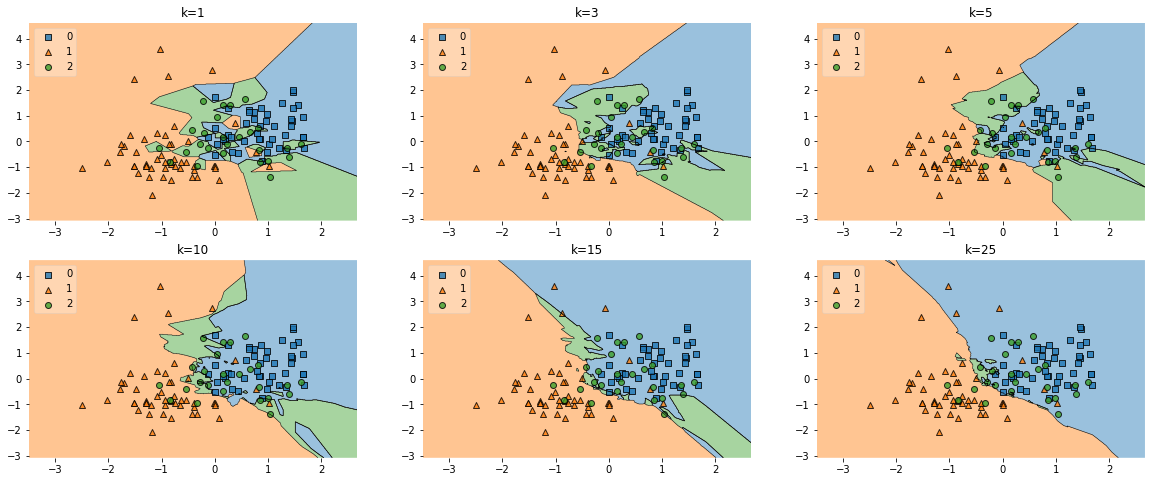

In [8]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)#сетка графиков(для шести - три столбца и два ряда)
fig = plt.figure(figsize=(20,8))
labels = ['k=1', 'k=3', 'k=5', 'k=10', 'k=15', 'k=25']#подписи графикам
for clf, lab, grd in zip(kncs,#список обученных классификаторов, полученный прежде
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):#три повторить два раза(шесть в итоге)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_TrainLimit, y=y_train, clf=clf, legend=2)#строим в цикле эти графики по данным тренировочной выборки и их ответам)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [9]:
#при к=1 
#видно, что поля решающей поверхности полностью совпадают с местоположением объектов выборки. 
#разделяющая поверхность слишком сложная, любое малое скопление(в данном случае вообще одиночный объект) сильно на нее влияет
#Здесь нельзя сказать что были найдены хоть какие-то закономерности расположения объектов => недообучение модели

#при к = 25
#заметно, что решающие поверхности жестко разделили области оранжевых и голубых объектов, модель нашла закономерность
#однако, смотря на зеленые, видно что подавляющее большинство находится за пределами зеленой области
#произошло переобучение модели, т.к. ситуация с зелеными сильно далека от "правды"
#закономерность, которая создалась оказалась слишком "жесткой"(голубой и оранжевый классы захватили зеленый) и относительно маленькие разреженные скопления объектов(как зеленые) уже не влияют на решающую поверхность, что порождает ошибки

#при к=15, к = 10
#ситуация схожа с к=25, ситуация с зелеными объектами все же лучше, но все равно присутствует переобучение

#при к = 3, к=5
#видно, что модель нашла закономерность разделения голубых и оранжевых и, к тому же, присутствует прослойка зеленой зоны, 
#которая в большей степени от двух предыдущих примеров соответствует скоплениям зеленых объектов
#при этих к наблюдается наибольшее(не считая к = 1) совпадение местоположений объектов и решающей поверхности

#заметим также, что в задаче 1.3 наибольшие значения train accuracy так же у к =3, к = 5

#можно сделать вывод, что к для кнн нужно выбирать где-то посередине(между значениями ситуаций недообучения и переобучения)
#сопоставляя результаты 1.3 и 1.5 выбираем к=5, так как оно лучшее из выбранных двух

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

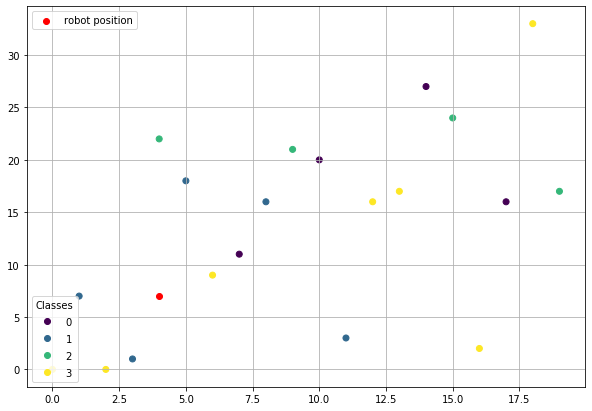

In [10]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean').fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        
        res = np.random.binomial(1,0.2)#моделируем подбрасывание(1 подбрасываение, вероятность орла 0.2)
        if res == 0:#число выпадений орла 0 => выпала решка => используем метод ближайших соседей
            cl = self.knn.predict([self.trajectory[-1]]) # смотрим каких соседей больше при роботе на точке последнего положения из траектории(эквивалентно текущей позиции робота) на выходе дается класс большинства соседей
            new_pos = self.trajectory[-1] + self.mapping[cl[0]] #находим новое местоположение, как текущее местоположение+смещение от класса(находим по класс-словарю)
        else:#выпал орел => просто вправо
            new_pos = self.trajectory[-1] + self.mapping[0] #находим новое местоположение, как текущее местоположение+смещение от класса(находим по класс-словарю, сооветствует нулевому классу(движение вправо))
        self.trajectory = np.vstack([self.trajectory, new_pos]) #добаляем новую позицию в траеторию, при следующем шаге она будет текущей и мы будем к ней обращаться

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [13]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory #приравниваем переменную к атрибуту(траектории) объекта класса(траектория за n шагов уже заполнилась)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

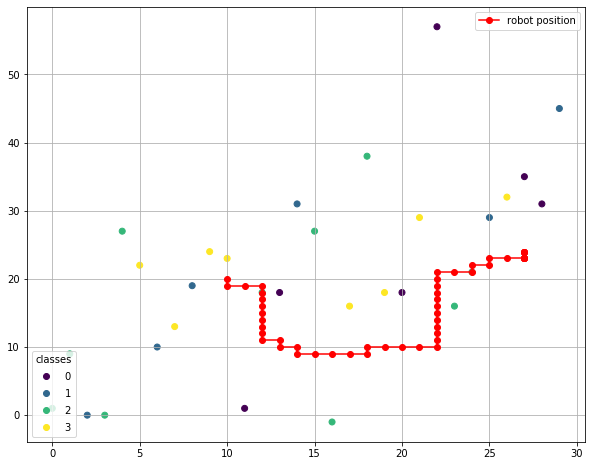

In [14]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

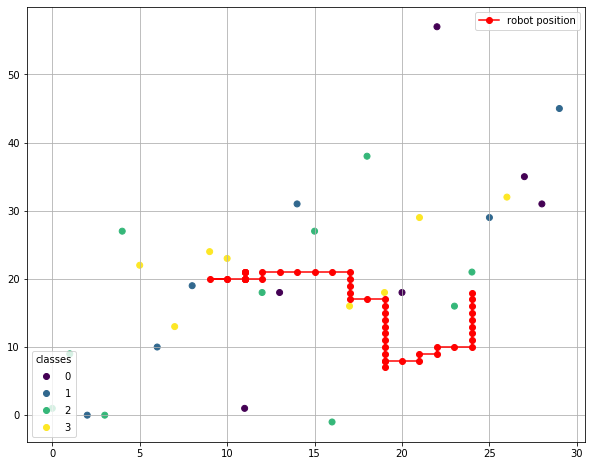

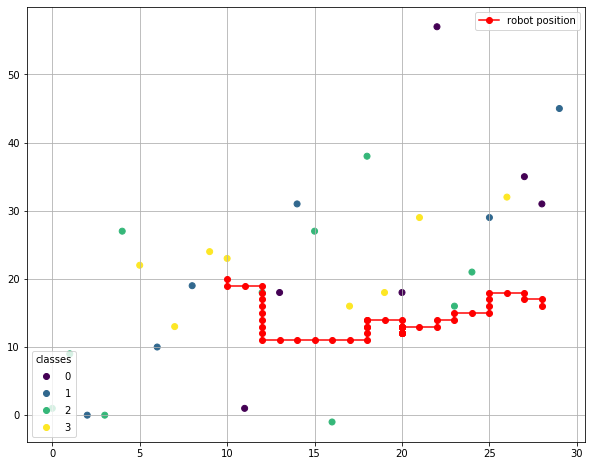

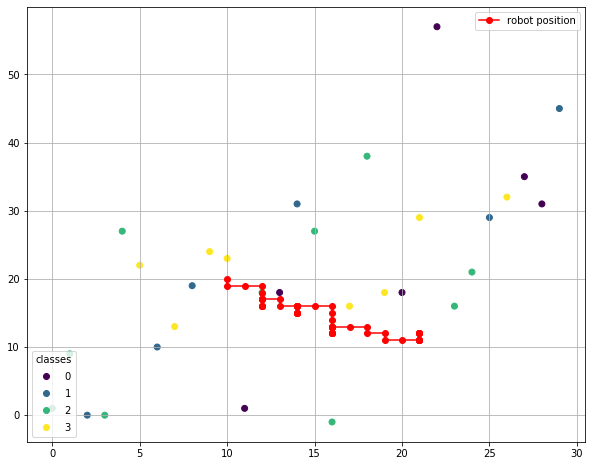

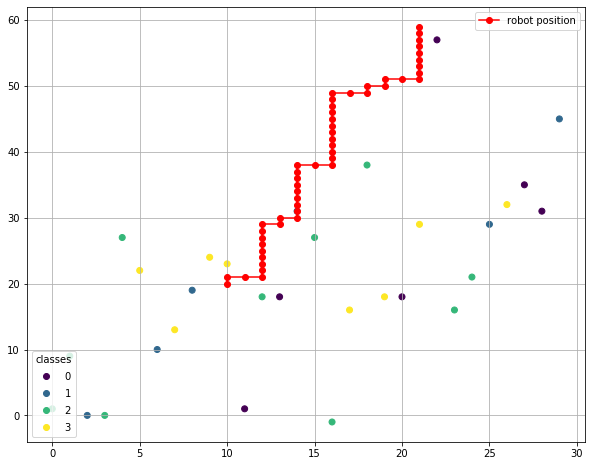

In [15]:
x = np.arange(30)
#на каждое значение к проводим эксперимент
ax1 = conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)
ax2 = conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)
ax3 = conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)
ax4 = conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)
plt.show()

In [16]:
#Число соседей существленно влияет на траекторию робота. 
#При малых к любое небольшое скопление точек влияет на каждый шаг робота и мы можем наблюдать разнообразие направлений
#Что же касается к = 30, то можно увидеть, как робот совершает только два вида шагов(вправо и вверх)
#дело в том, что среди всех 30 точек большинство из них желтых(3 класс -вверх) поэтому робот идет только вверх(если выпадает решка)
#если орел-то вправо, и никакие другие точки уже не влияют на выбор шага

#если бы мы давали классы точкам не рандомно, а создавали места их скопления или диктовали число элементов каждого класса точек,
#то траектория робота была более предсказуемая.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [17]:
data = pd.read_csv("https://github.com/hse-ds/iad-intro-ds/blob/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv?raw=true", sep = ',')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [18]:
print("Есть ли пропущенные?", X.isnull().any().any(),"=> нет")

Есть ли пропущенные? False => нет


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [19]:
#колонка Unnamed: 0 совпадает со значениями индекса строк и информации для объектов не несет
data = data.drop('Unnamed: 0', axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [20]:
data[['carat', 'depth','x','y','z','table','price']].corr()
#с price больше всего кореллирует carat, в чуть меньшей степени(но все равно сильно) x, y, z , немного кореллирует table и отрицательно кореллирует depth

,carat,depth,x,y,z,table,price
carat,1.000000,0.028224,0.975094,0.951722,0.953387,0.181618,0.921591
depth,0.028224,1.000000,-0.025289,-0.029341,0.094924,-0.295779,-0.010647
x,0.975094,-0.025289,1.000000,0.974701,0.970772,0.195344,0.884435
y,0.951722,-0.029341,0.974701,1.000000,0.952006,0.183760,0.865421
z,0.953387,0.094924,0.970772,0.952006,1.000000,0.150929,0.861249
table,0.181618,-0.295779,0.195344,0.183760,0.150929,1.000000,0.127134
price,0.921591,-0.010647,0.884435,0.865421,0.861249,0.127134,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [21]:
data = pd.get_dummies(data)
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [22]:
np.random.seed(12345)
from sklearn.model_selection import train_test_split
X = data.drop('price', 1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [24]:
from sklearn.linear_model import LinearRegression

def MSE(y, y_pred):
    return np.mean(np.square(y_pred-y))

reg = LinearRegression().fit(X_train, y_train)#создаем объект класса лин регрессии и обучаем его тренировочной выборкой
pred_train = reg.predict(X_train)#узнаем вектор ответов-предсказаний по тренировчной выборке
pred_test = reg.predict(X_test)#узнаем вектор ответов-предсказаний по тестовой выборке
mse1 = MSE(y=y_train, y_pred=pred_train)#узнаем среднеквадр ошибку между предсказанием и реальным значением(тренировочная)
mse2 = MSE(y=y_test, y_pred=pred_test)#узнаем среднеквадр ошибку между предсказанием и реальным значением(тестовая)
print("The Mean Square Error on train is: " , mse1)
print("The Mean Square Error on test is: " , mse2)

The Mean Square Error on train is:  1295922.1606362103
The Mean Square Error on test is:  1262860.109448169


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [25]:
for i in range(len(reg.coef_)):
    print(X.columns[i], reg.coef_[i])
#если смотреть только на вещественные переменные, то относительно большие коэффициенты у 'carat' и 'x'

carat 5363.7831046561105
depth -99.14620551147266
table -65.03259436878201
x -1542.9760960346198
y 416.6250469982797
z -33.46820639719775
cut_Fair -57185550884351.04
cut_Good -97528872169017.9
cut_Ideal -165924288503516.88
cut_Premium -147824589861599.97
cut_Very Good -141441000723912.03
color_D -787191876898316.5
color_E -915987393443392.0
color_F -904571514258073.0
color_G -961046061570005.2
color_H -853201816628326.1
color_I -710370499053694.4
color_J -521797956396314.25
clarity_I1 -5931376093919.45
clarity_IF -9341888801640.035
clarity_SI1 -22365949330757.45
clarity_SI2 -19580623764851.41
clarity_VS1 -18671854802285.504
clarity_VS2 -21766791160618.293
clarity_VVS1 -13080041597318.492
clarity_VVS2 -15290053015380.455


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [26]:
from sklearn import linear_model
clf1 = linear_model.Lasso(alpha=10)#создаем объект лассо-регрессии с альфой 10
clf1.fit(X_train, y_train)#обучаем объект
for i in range(len(clf1.coef_)):
    print(X.columns[i], clf1.coef_[i])

carat 4910.8500051755545
depth -69.30907969217614
table -52.566899195608954
x -687.6483460720113
y -0.0
z -38.413034509301106
cut_Fair -118.10179115011776
cut_Good -43.89538358712757
cut_Ideal 41.67608363128318
cut_Premium 0.0
cut_Very Good -0.0
color_D 149.7995772948563
color_E 92.44744252618574
color_F 66.41975307231515
color_G -0.0
color_H -170.4904847982368
color_I -280.1690768795116
color_J -406.5461038937279
clarity_I1 -474.73983707149773
clarity_IF 194.16161987356188
clarity_SI1 -264.5114031730084
clarity_SI2 -591.1027480029974
clarity_VS1 95.23827407034031
clarity_VS2 -0.0
clarity_VVS1 185.53536030750038
clarity_VVS2 198.3640678620514


In [27]:
clf2 = linear_model.Ridge(alpha=10)
clf2.fit(X_train, y_train)
for i in range(len(clf2.coef_)):
    print(X.columns[i], clf2.coef_[i])

carat 5328.434131143347
depth -97.41161558224528
table -65.19129678307691
x -1375.3585740138922
y 287.68488383098526
z -37.32200122710156
cut_Fair -114.84719351077048
cut_Good -44.19141760547378
cut_Ideal 50.0918707488312
cut_Premium 19.55297482593105
cut_Very Good -2.2930363128920477
color_D 212.90207243416327
color_E 161.96742096586974
color_F 136.07721151823787
color_G 55.28269720623881
color_H -127.49093805394065
color_I -252.24895844904447
color_J -391.35831119134485
clarity_I1 -456.8219114511989
clarity_IF 247.2490404406079
clarity_SI1 -153.77098502001868
clarity_SI2 -503.32518836913965
clarity_VS1 200.32795596370568
clarity_VS2 106.75344175785074
clarity_VVS1 255.52713526967855
clarity_VVS2 280.44276788151103


In [28]:
#заметно, что веса стали меньше(особенно у категориальных)
#что касается вещественных и мультиколлинеарности, веса уменьшились, но несильно. Проблема мультиколлинеарности проявляется сильно
#(чем больше корелляция с целевой переменной, тем больше веса)
#мы только штрафовали за веса, с корелляцией ничего не делали, поэтому веса сильноколлерирующих остались относительно большими.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

C:\ANAC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2459268778.291115, tolerance: 60916213.48149713
  positive)


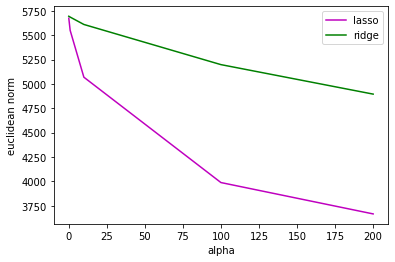

In [29]:
alphas = [0.1, 1, 10, 100, 200]
lassos = []
ridges = []
for alpha in alphas:#для каждого значения альфа сделать:
    las = linear_model.Lasso(alpha=alpha).fit(X_train, y_train)#создать и обучить объект лассо регр
    lassos.append(las)#добавить в список таких объектов
    rid = linear_model.Ridge(alpha=alpha).fit(X_train, y_train)#создать и обучить объект ридж регр
    ridges.append(rid)#добавить в список таких объектов


lassos_linalg = []
for i in lassos:#для каждого объекта лассо регр сделать:
    yl = np.linalg.norm(i.coef_)#высчитать евкл норму весов для объекта лассо регр
    lassos_linalg.append(yl)#добавить значение в список
plt.plot(alphas,lassos_linalg, color = "m")#построить график

ridges_linalg = []
for i in ridges:#для каждого объекта ридж регр сделать:
    yr = np.linalg.norm(i.coef_)#высчитать евкл норму весов для объекта ридж регр
    ridges_linalg.append(yr)#добавить значение в список
plt.plot(alphas,ridges_linalg, color = "g")#построить график
plt.legend(["lasso", "ridge"])
plt.xlabel('alpha')
plt.ylabel('euclidean norm')
plt.show()
#заметно что при увеличении альфа евклидова норма меняется(уменьшается) сильнее у лассо регрессии чем у ридж регрессии => агрессивнее метод у лассо регрессии и поэтому ее чаще используют

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [30]:
from sklearn.linear_model import LassoCV
lascv = LassoCV(cv=5, alphas = [0.1, 1, 10, 100, 200]).fit(X_train, y_train)#создадим объект и обучим
lerr = lascv.mse_path_
print("таблица ошибок", lerr)
meanlascv = np.mean(lerr, axis=1)
print("усредняем ошибки для каждого альфа", meanlascv)
print("находим наименьшую ошибку", np.min(meanlascv))
print("узнаем в каком порядке lasscv взял альфы", lascv.alphas_)
print("наименьшее значение соответствует предпоследней альфе => наибольшее качество при альфа равном 1")

C:\ANAC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9926035534.416435, tolerance: 48298505.0637051
  tol, rng, random, positive)
C:\ANAC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680214944.1530228, tolerance: 48707112.277734704
  tol, rng, random, positive)
C:\ANAC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1113224727.206421, tolerance: 49061005.39054555
  tol, rng, random, positive)
C:\ANAC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1936547358

таблица ошибок [[2102068.22787287 1959443.92013572 1962785.63538655 1852542.76151037
  1997840.80720837]
 [1651102.90647583 1531924.37862888 1550610.75061012 1462132.9686097
  1571693.76584126]
 [1390514.71006946 1281673.43451618 1307767.1391746  1230407.27350391
  1343911.39229848]
 [1383244.14046607 1265665.46055847 1289011.93417879 1212695.41372481
  1349475.20400355]
 [1391833.11436765 1263927.25999717 1287167.8642855  1211710.22403783
  1350186.75000083]]
усредняем ошибки для каждого альфа [1974936.27042277 1553492.95403316 1310854.78991253 1300018.43058634
 1300965.0425378 ]
находим наименьшую ошибку 1300018.4305863378
узнаем в каком порядке lasscv взял альфы [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]
наименьшее значение соответствует предпоследней альфе => наибольшее качество при альфа равном 1


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [31]:
las_fin = linear_model.Lasso(alpha=1).fit(X_train, y_train)
for i in range(len(las_fin.coef_)):
    print(X.columns[i], las_fin.coef_[i])


carat 5330.404095280693
depth -99.61246067058208
table -65.13694696438594
x -1099.467206095061
y 0.0
z -27.414513679679906
cut_Fair -122.33847224159412
cut_Good -52.35467989622173
cut_Ideal 33.852947871841465
cut_Premium 0.0
cut_Very Good -13.029381695082998
color_D 166.21872858421943
color_E 107.90312435521841
color_F 82.98888273067783
color_G -0.0
color_H -176.5015746343916
color_I -292.4222976356257
color_J -420.54909628817256
clarity_I1 -486.04375912887537
clarity_IF 200.70750983441212
clarity_SI1 -263.1041101252998
clarity_SI2 -599.0393140062474
clarity_VS1 107.766844457946
clarity_VS2 -0.0
clarity_VVS1 190.3529991005432
clarity_VVS2 204.62636373390893


In [32]:
#так как мы нормировали признаки, то по тому, наскольно значения весов далеки от нуля мы можем судить об их важности
#больше всего коэффициенты у признаков carat, x они оказались наиболее информативными(и с самого начала они сильно влияли на результат)
#наименее - некторые позиции категориальных признаков

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [33]:
pred_test_las = las_fin.predict(X_test)
mse_las = MSE(y=y_test, y_pred=pred_test_las)
print("The Mean Square Error is: " , mse_las)

The Mean Square Error is:  1232322.6149989322


In [34]:
print("MSE обычной линейной регрессии:" , mse2)
print("MSE лассо регрессии с альфой = 1:" ,mse_las)
#сопоставляя значения ошибок, можно сказать, что лассо регрессия справляется с предсказаниями лучше(ошибка меньше)
#мы ввели штраф за большие веса, которые очень влияют на значение ошибки и взяли для регулизатора самую удачную альфу => ошибка уменьшилась, т.к веса стали более адекватными


MSE обычной линейной регрессии: 1262860.109448169
MSE лассо регрессии с альфой = 1: 1232322.6149989322
